# ✈️ Phase 1 Project: Aviation Safety Analysis
### Author: Victor Onyango
### Date: October 2025

---
## 1️⃣ Business Understanding
Your company is exploring opportunities in the aviation industry and wants to identify **low-risk aircraft models** for potential investment.

**Business Objective:**
- Determine which aircraft makes and models are associated with the fewest accidents.
- Identify safety trends across time, category, and injury severity.

**Key Questions:**
1. Which aircraft makes have the lowest accident rates?
2. What are the most common causes or conditions associated with accidents?
3. How have accident trends changed over time?

---

## 2️⃣ Data Understanding
In this section, we’ll load the **airline_accidents.csv file** and explore its structure.

We’ll examine key variables like `Event.Date`, `Make`, `Model`, `Aircraft.Category`, and `Injury.Severity`.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('airline_accidents.csv')

df.head(10)  # Display the first 10 rows of the dataset

C:\Users\user\AppData\Local\Temp\ipykernel_18080\1108383730.py:6: DtypeWarning: Columns (0,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airline_accidents.csv')


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,Instructional,,,,,2,VMC,LANDING,02/28/2008,
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,...,Unknown,,,,,1,,,02/06/2008,
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,,,,,1,VMC,TAKEOFF,02/28/2008,
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,,1,,,,VMC,MANEUVERING,06/20/2014,
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,...,Other Work Use,,3,0,0,0,VMC,MANEUVERING,01/15/2009,
5,20080129X00118,Accident,DEN08CA045,12/29/2007,"Gunnison, CO",United States,38.533889,-106.933056,,,...,Personal,,,,,5,VMC,TAKEOFF,02/28/2008,
6,20080214X00193,Accident,CHI08CA056,12/29/2007,"Abingdon, IL",United States,40.799722,-90.438611,,,...,Personal,,,,,2,VMC,MANEUVERING,02/28/2008,
7,20080215X00200,Accident,CHI08CA058,12/29/2007,"Crystal Falls, MI",United States,46.800000,-88.360000,,,...,Personal,,,,,1,VMC,LANDING,02/28/2008,
8,20071231X02014,Accident,DFW08FA053,12/29/2007,"Venice, LA",United States,28.958056,-89.258889,,South Pass 38,...,,,1,1,2,,IMC,APPROACH,07/15/2009,
9,20080103X00010,Accident,DFW08LA052,12/29/2007,"Crowley, TX",United States,32.557222,-97.485555,,,...,Personal,,2,0,0,0,VMC,MANEUVERING,12/03/2008,


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150959 entries, 0 to 150958
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Event Id                 150959 non-null  object
 1   Investigation Type       150959 non-null  object
 2   Accident Number          150959 non-null  object
 3   Event Date               150959 non-null  object
 4   Location                 150959 non-null  object
 5   Country                  150959 non-null  object
 6   Latitude                 150959 non-null  object
 7   Longitude                150959 non-null  object
 8   Airport Code             150959 non-null  object
 9   Airport Name             150959 non-null  object
 10  Injury Severity          150959 non-null  object
 11  Aircraft Damage          150959 non-null  object
 12  Aircraft Category        150959 non-null  object
 13  Registration Number      150959 non-null  object
 14  Make                

---
## 3️⃣ Data Preparation
Here, we’ll clean the dataset by:
- Handling missing values
- Converting data types (like dates)
- Standardizing text (e.g., upper/lower case)


In [29]:
# Check total missing values
df.isna().sum().sort_values(ascending=False).head(10)





Event Id              0
Investigation Type    0
Accident Number       0
Event Date            0
Location              0
Country               0
Latitude              0
Longitude             0
Airport Code          0
Airport Name          0
dtype: int64

In [30]:
# Calculate missing value percentage per column
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0].sort_values(ascending=False)



Series([], dtype: float64)

In [31]:
# Verify no missing values remain in key columns
df.isna().sum().head()


Event Id              0
Investigation Type    0
Accident Number       0
Event Date            0
Location              0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150959 entries, 0 to 150958
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Event Id                 150959 non-null  object
 1   Investigation Type       150959 non-null  object
 2   Accident Number          150959 non-null  object
 3   Event Date               150959 non-null  object
 4   Location                 150959 non-null  object
 5   Country                  150959 non-null  object
 6   Latitude                 150959 non-null  object
 7   Longitude                150959 non-null  object
 8   Airport Code             150959 non-null  object
 9   Airport Name             150959 non-null  object
 10  Injury Severity          150959 non-null  object
 11  Aircraft Damage          150959 non-null  object
 12  Aircraft Category        150959 non-null  object
 13  Registration Number      150959 non-null  object
 14  Make                

In [34]:
# Convert date columns to datetime objects
df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce')

In [35]:
# Convert text columns to consistent case
df['Make'] = df['Make'].str.title()
df['Model'] = df['Model'].str.upper()

In [36]:
df.describe()

,Event Date
count,150952
mean,1981-05-22 00:46:06.251523520
min,1948-10-24 00:00:00
25%,1970-10-20 00:00:00
50%,1979-02-24 00:00:00
75%,1990-07-27 00:00:00
max,2007-12-31 00:00:00


In [38]:
df.head(10)

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
0,20080125X00106,Accident,SEA08CA056,2007-12-31,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,Instructional,,,,,2,VMC,LANDING,02/28/2008,
1,20080206X00141,Accident,CHI08WA075,2007-12-31,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,...,Unknown,,,,,1,,,02/06/2008,
2,20080129X00122,Accident,CHI08CA057,2007-12-30,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,,,,,1,VMC,TAKEOFF,02/28/2008,
3,20080114X00045,Accident,LAX08FA043,2007-12-30,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,,1,,,,VMC,MANEUVERING,06/20/2014,
4,20080109X00032,Accident,NYC08FA071,2007-12-30,"Cherokee, AL",United States,34.688611,-87.920000,,,...,Other Work Use,,3,0,0,0,VMC,MANEUVERING,01/15/2009,
5,20080129X00118,Accident,DEN08CA045,2007-12-29,"Gunnison, CO",United States,38.533889,-106.933056,,,...,Personal,,,,,5,VMC,TAKEOFF,02/28/2008,
6,20080214X00193,Accident,CHI08CA056,2007-12-29,"Abingdon, IL",United States,40.799722,-90.438611,,,...,Personal,,,,,2,VMC,MANEUVERING,02/28/2008,
7,20080215X00200,Accident,CHI08CA058,2007-12-29,"Crystal Falls, MI",United States,46.800000,-88.360000,,,...,Personal,,,,,1,VMC,LANDING,02/28/2008,
8,20071231X02014,Accident,DFW08FA053,2007-12-29,"Venice, LA",United States,28.958056,-89.258889,,South Pass 38,...,,,1,1,2,,IMC,APPROACH,07/15/2009,
9,20080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,32.557222,-97.485555,,,...,Personal,,2,0,0,0,VMC,MANEUVERING,12/03/2008,


---
## 4️⃣ Data Analysis and Visualization
We’ll now explore accident frequency and trends across aircraft makes, years, and severity.


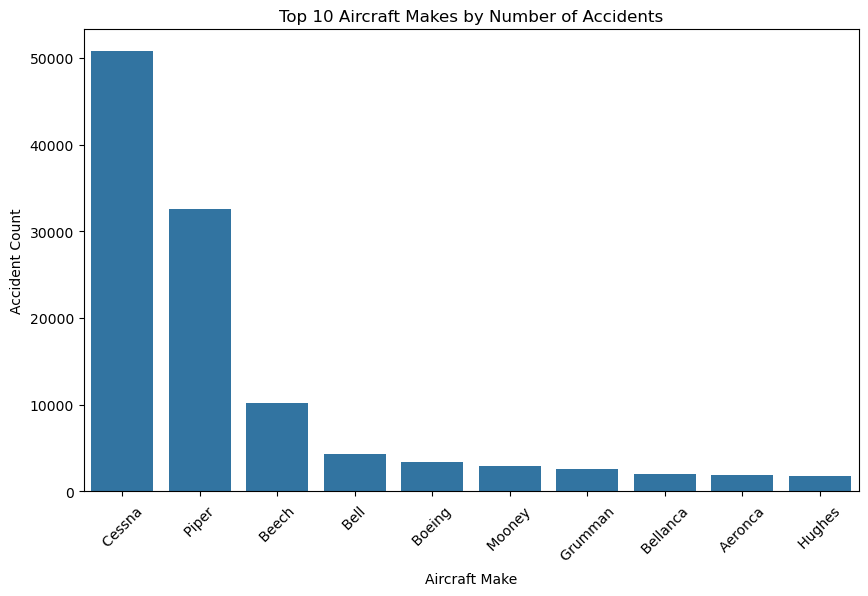

In [39]:
# Top 10 Aircraft Makes by Accident Count
top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Top 10 Aircraft Makes by Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

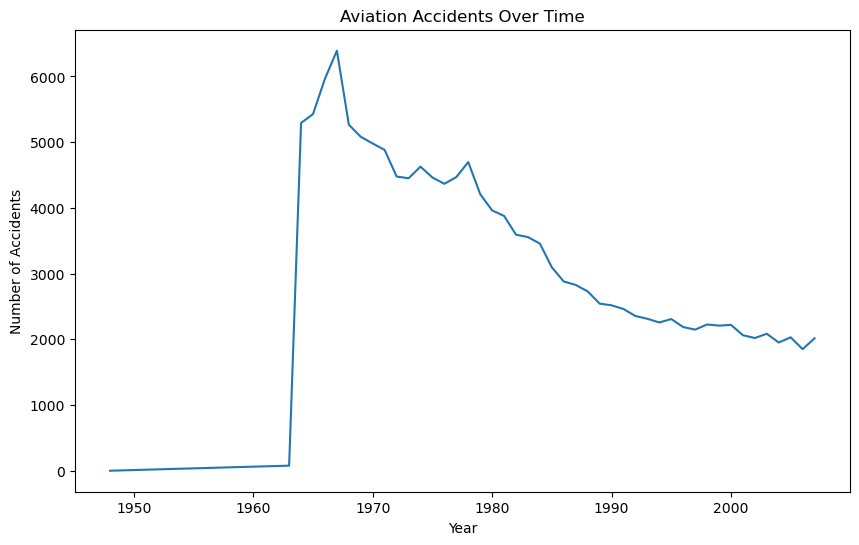

In [40]:
# Accident Trends Over Time
df['Year'] = df['Event Date'].dt.year
accidents_per_year = df.groupby('Year').size()

plt.figure(figsize=(10,6))
plt.plot(accidents_per_year.index, accidents_per_year.values)
plt.title('Aviation Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

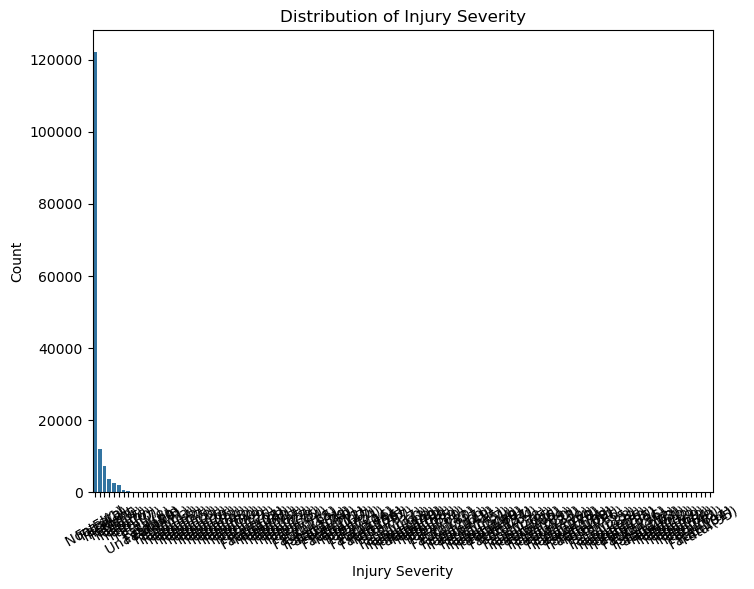

In [46]:
# Injury Severity Distribution
severity_counts = df['Injury Severity'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

---
## 5️⃣ Key Findings and Recommendations
1. Top Aircraft Makes by Accident Count

Observation: Cessna and Piper dominate the number of recorded accidents, followed by Beech, Bell, and Boeing.

Interpretation: These brands have high accident counts primarily because they manufacture large fleets of small general aviation aircraft. This doesn’t necessarily mean they are unsafe — rather, they are the most widely used.

2. Aviation Accidents Over Time

Observation: Accident rates peaked in the late 1960s–1970s, followed by a steady decline.

Interpretation: This trend aligns with technological advances, better training, and stricter safety regulations.

Business Insight: The aviation industry has become significantly safer over time, suggesting that modern aircraft models are much lower-risk.

3. Distribution of Injury Severity

Observation: Most reported cases fall into “No Injury” or “Minor Injury” categories.

Interpretation: While accidents occur, fatal outcomes are relatively rare, emphasizing improved aircraft safety designs and response systems.

Business Recommendations

Invest in newer aircraft models — Data indicates accident frequency and severity have declined significantly in recent years.

Avoid older or overused aircraft types, especially small private planes (like older Cessna and Piper models) until condition and maintenance history are verified.

Partner with manufacturers that emphasize safety and maintenance — brands with strong safety records (modern Boeing, Airbus) are lower-risk investments
